In [1]:
import pandas as pd
import numpy as np

# 공유자전거 수요 예측을 위한 데이터 전처리 및 정제

## 1. Data Load 및 데이터 전처리(pre-processin)
- 컬럼값에 특수문자 포함

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/SeoulBikeData.csv')
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/SeoulBikeData.csv', encoding='latin-1')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### 전처리1) 특수문자가 포함된 컬럼명 변경

In [4]:
# prompt: df DataFrame 사용: df 데이터셋의 컬럼명을 일괄로 바꿀 수 있는 코드를 제공해주세요

# 컬럼명을 변경하기 위한 딕셔너리를 생성합니다.
new_columns = {
    'Date': 'date',
    'Rented Bike Count': 'rented_bike_count',
    'Hour': 'hour',
    'Temperature(\u00b0C)': 'temperature',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(\u00b0C)': 'dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'solar_radiation',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Functioning Day': 'functioning_day'
}

# rename() 함수를 사용하여 컬럼명을 변경합니다.
df = df.rename(columns=new_columns)


In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day'],
      dtype='object')

### 전처리2) 날짜(date) 컬럼과 시간컬럼(hour) 결합후 index 컬럼으로 설정

In [7]:
# prompt: date 컬럼과 hour 컬럼을 합쳐서 datetime으로 변경하는 코드를 제공해주세요

#import pandas as pd

# 'date'와 'hour' 컬럼을 합쳐서 datetime 객체로 변환합니다.
#df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'].astype(str) + ':00:00')
# 'date'와 'hour' 컬럼을 합쳐서 datetime 객체로 변환합니다.
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'].astype(str) + ':00:00', format='%d/%m/%Y %H:%M:%S') # Added format argument to specify the correct date format


# 'date'와 'hour' 컬럼은 더 이상 필요 없으므로 삭제합니다.
df = df.drop(['date', 'hour'], axis=1)

# 결과 확인
print(df.head())
print(df.info())


   rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      holiday functioning_day            datetime  
0  No Holiday             Yes 2017-12-01 00:00:00  
1  No Holiday             Yes 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rented_bike_count      8760 non-null   int64         
 1   temperature            8760 non-null   float64       
 2   humidity               8760 non-null   int64         
 3   wind_speed             8760 non-null   float64       
 4   visibility             8760 non-null   int64         
 5   dew_point_temperature  8760 non-null   float64       
 6   solar_radiation        8760 non-null   float64       
 7   rainfall               8760 non-null   float64       
 8   snowfall               8760 non-null   float64       
 9   seasons                8760 non-null   object        
 10  holiday                8760 non-null   object        
 11  functioning_day        8760 non-null   object        
 12  datetime               8760 non-null   datetime64[ns]
dtypes: 

In [10]:
# prompt: date 컬럼을 index 컬럼으로 변환시키는 코드를 제공해주세요

df = df.set_index('datetime')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   temperature            8760 non-null   float64
 2   humidity               8760 non-null   int64  
 3   wind_speed             8760 non-null   float64
 4   visibility             8760 non-null   int64  
 5   dew_point_temperature  8760 non-null   float64
 6   solar_radiation        8760 non-null   float64
 7   rainfall               8760 non-null   float64
 8   snowfall               8760 non-null   float64
 9   seasons                8760 non-null   object 
 10  holiday                8760 non-null   object 
 11  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 889.7+ KB


,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
datetime,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30 20:00:00,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30 21:00:00,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
## 2. 새로운 변수 파생(생성)

## 전처리3). 새로운 변수 파생(생성)
- 날짜 정보를 기반으로 요일과 월 정보 생성

In [12]:
# prompt: 날짜 타입 index 변수에서 요일과 월 정보를 추출할 수 있는 코드를 제공해주세요

# 요일 추출
df['day_of_week'] = df.index.dayofweek

# 월 추출
df['month'] = df.index.month

# 결과 확인
df.head(10)

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day_of_week,month
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 05:00:00,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 06:00:00,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 07:00:00,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 08:00:00,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,4,12


In [13]:
df.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'day_of_week',
       'month'],
      dtype='object')

## 2 데이터탐색
- 종속변수(종속변수) : rented_bike_count
- 설명변수(독립변수) : 'temperature', 'humidity', 'wind_speed','visibility','dew_point_temperature', 'solar_radiation', 'rainfall','snowfall', 'seasons', 'holiday', 'day_of_week','month'

### 2.1) 종속변수인 rented_bike_count 컬럼 시각화(visualizaton)
  - 클린징 요소 : functioning_day == 'No' 인 조건의 데이터 제거

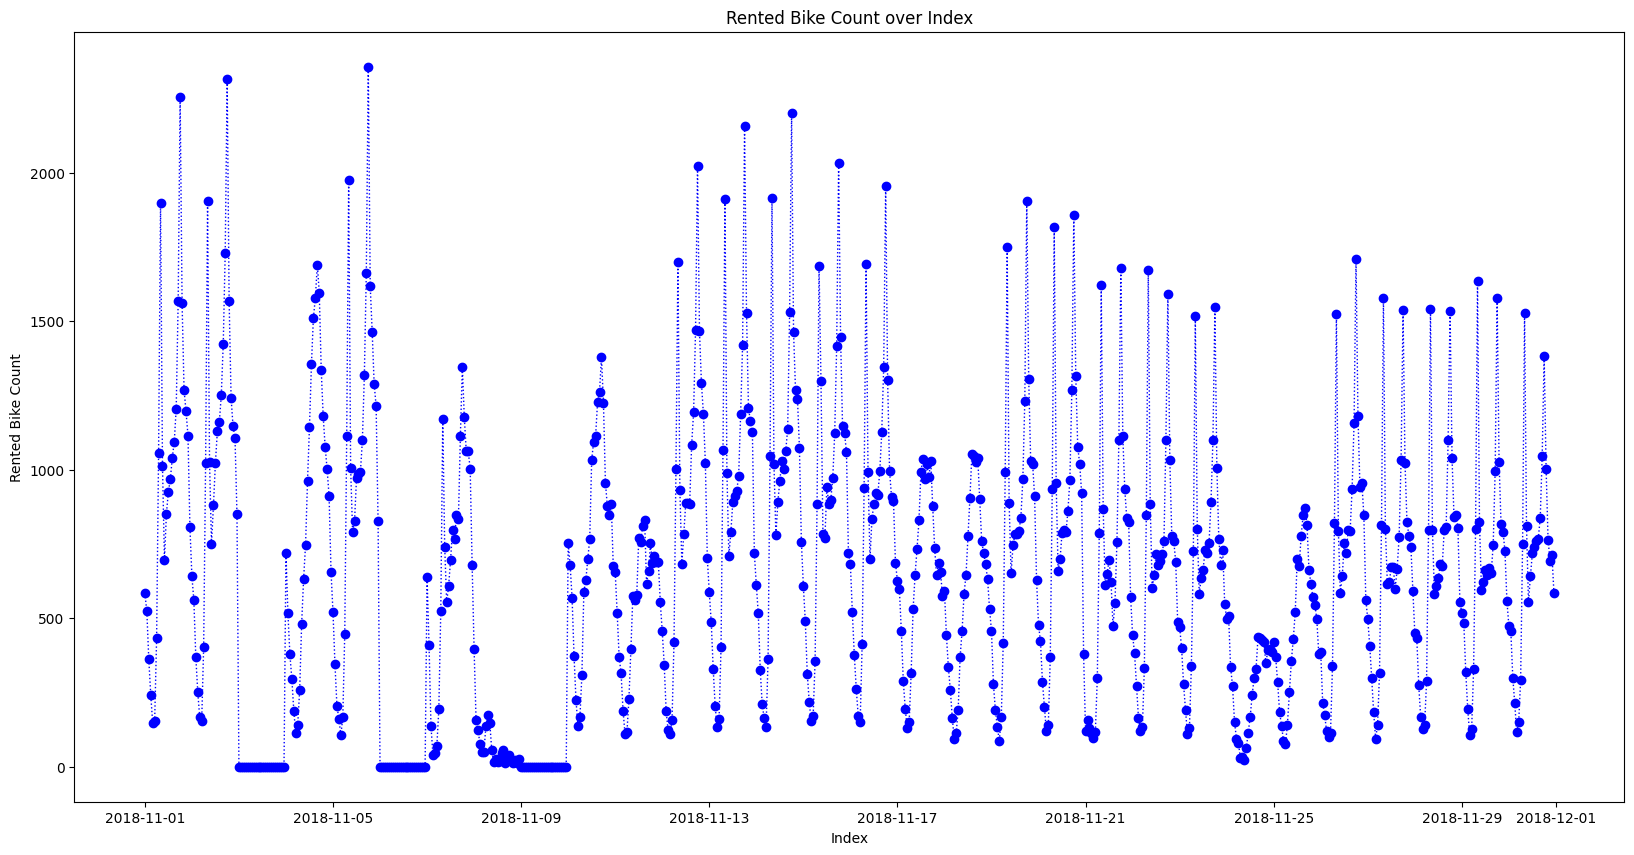

In [19]:
# prompt: df DataFrame 사용: rented_bike_count 컬럼에 index를 기준으로 plot을 그릴 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt

df_filter = df[df.index >= '2018-11-01']

# 'rented_bike_count' 컬럼을 index를 기준으로 plot합니다.
plt.figure(figsize=(20,10))
plt.plot(df_filter.index, df_filter['rented_bike_count'], marker='o',markersize=6, color='blue',linestyle=':',linewidth=1)
# plt.plot(df.index, df['rented_bike_count'])
plt.xlabel('Index')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count over Index')
plt.show()

### 2.2) 독립변수 데이터 탐색

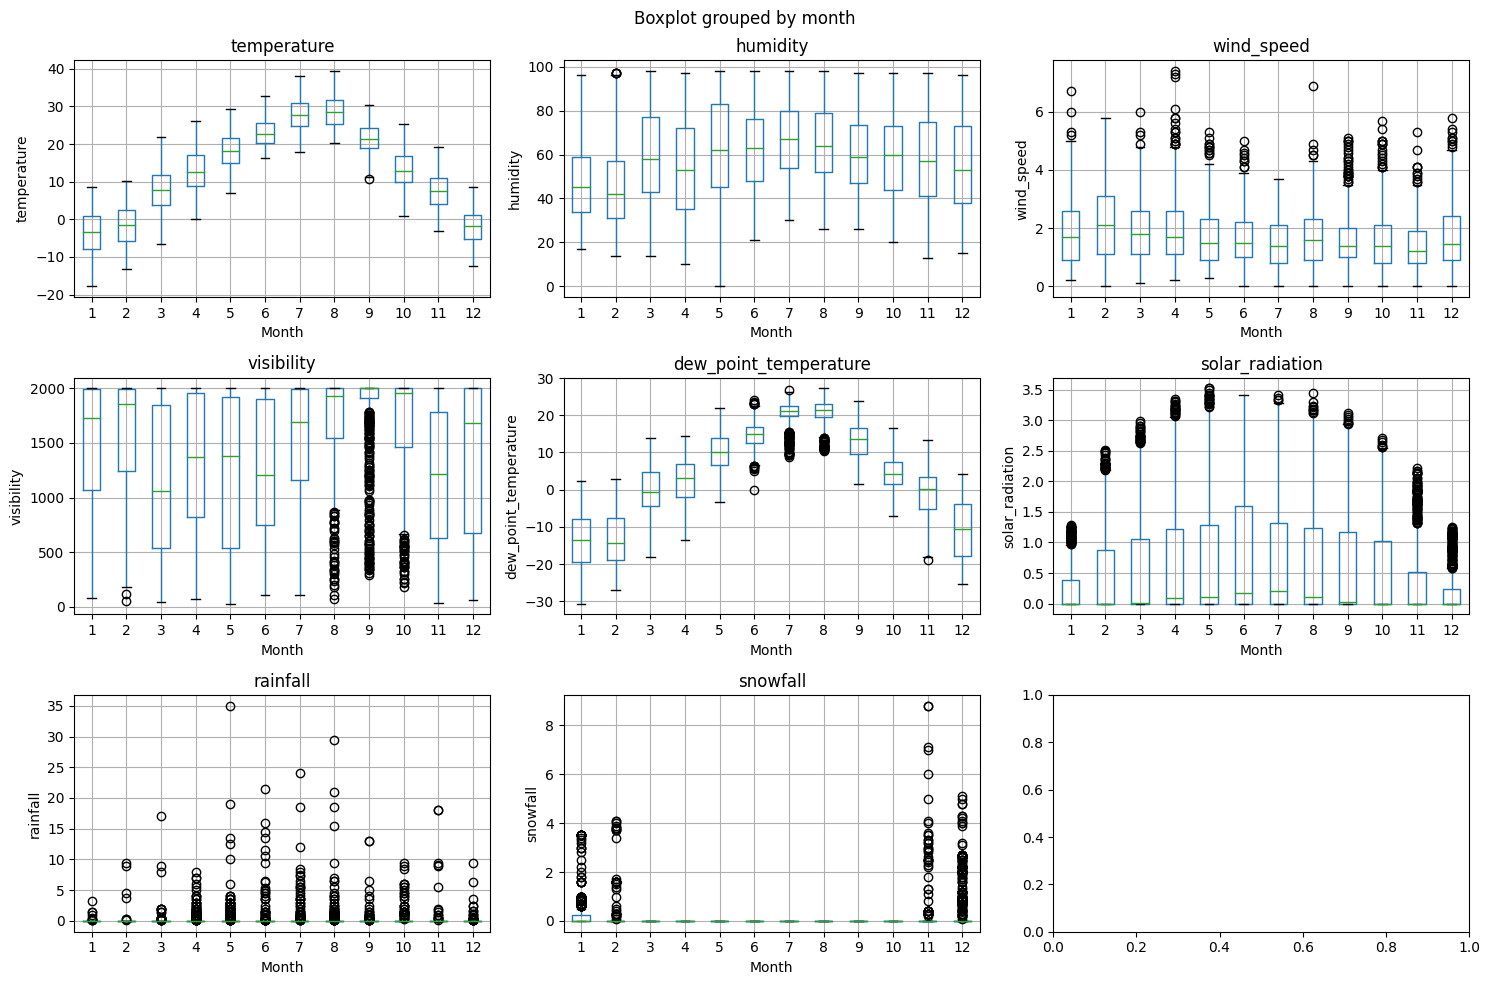

In [ ]:
# prompt: 'temperature', 'humidity', 'wind_speed','visibility','dew_point_temperature', 'solar_radiation', 'rainfall','snowfall' 컬럼에 대해서 월별 boxplot을  3열로 그릴 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt

# 컬럼 리스트
columns = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']

# 3열로 boxplot 그리기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Monthly Boxplot of Independent Variables', fontsize=16)

for i, column in enumerate(columns):
  row = i // 3
  col = i % 3
  df.boxplot(column=column, by='month', ax=axes[row, col])
  axes[row, col].set_title(column)
  axes[row, col].set_xlabel('Month')
  axes[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()


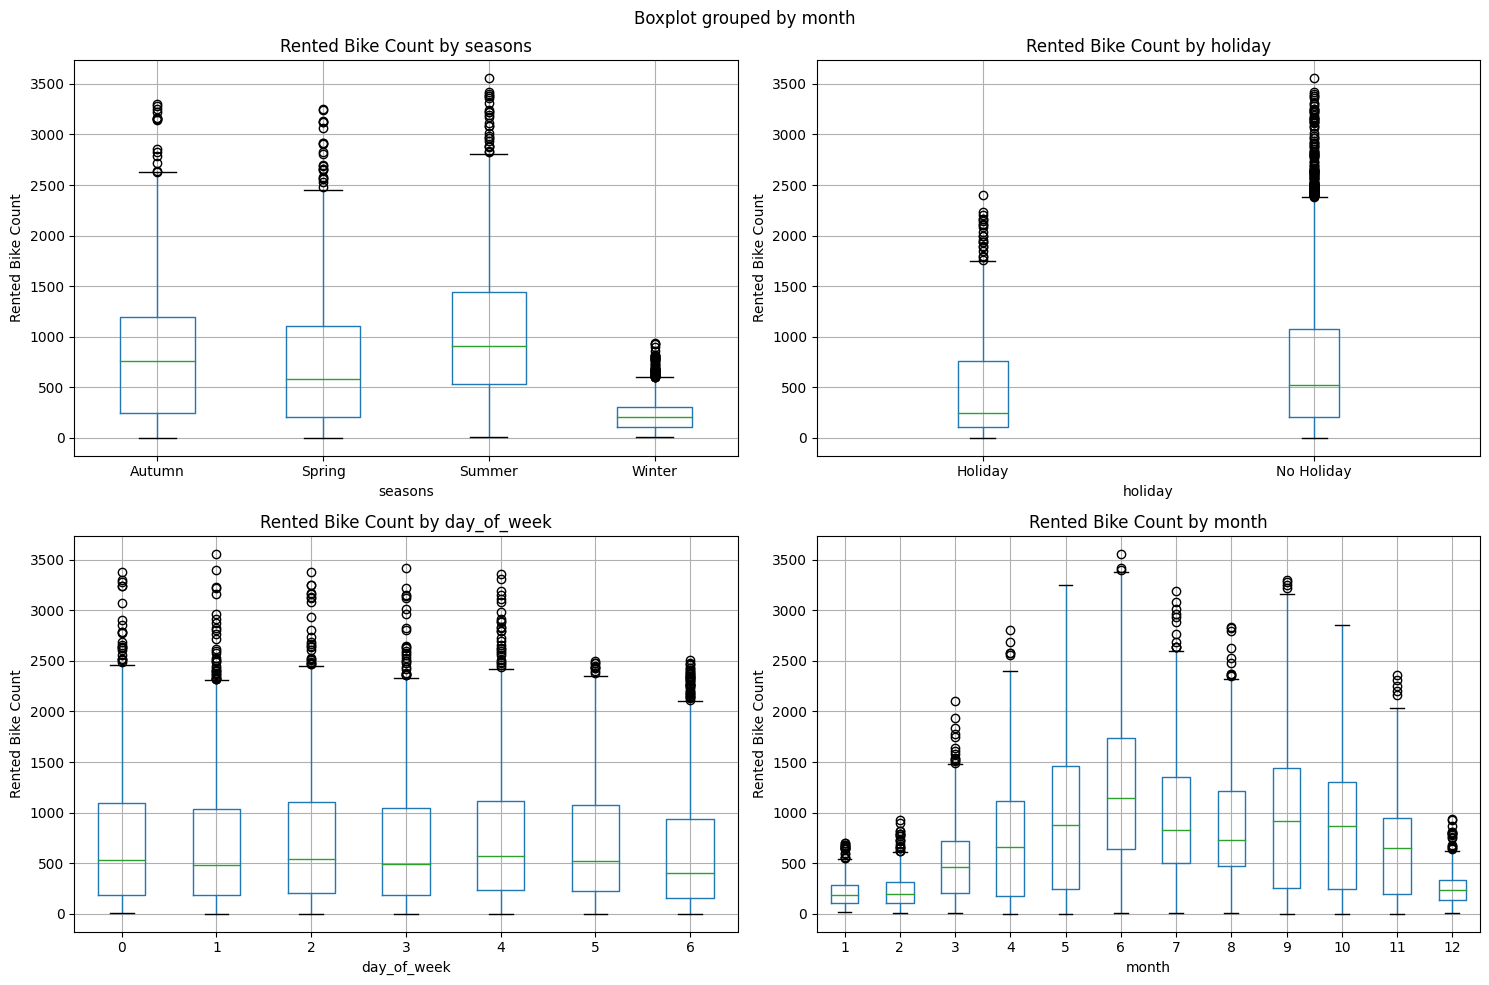

In [ ]:
# prompt:  'seasons', 'holiday', 'day_of_week','month' 각 컬럼별 rented_bike_count의 boxplot을 그릴 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt
# 컬럼 리스트
columns = ['seasons', 'holiday', 'day_of_week','month']

# 2열로 boxplot 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplot of Independent Variables vs Rented Bike Count', fontsize=16)

for i, column in enumerate(columns):
  row = i // 2
  col = i % 2
  df.boxplot(column='rented_bike_count', by=column, ax=axes[row, col])
  axes[row, col].set_title(f'Rented Bike Count by {column}')
  axes[row, col].set_xlabel(column)
  axes[row, col].set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()


### 2.3) 종속변수와 독립변수간의 상관성 파악

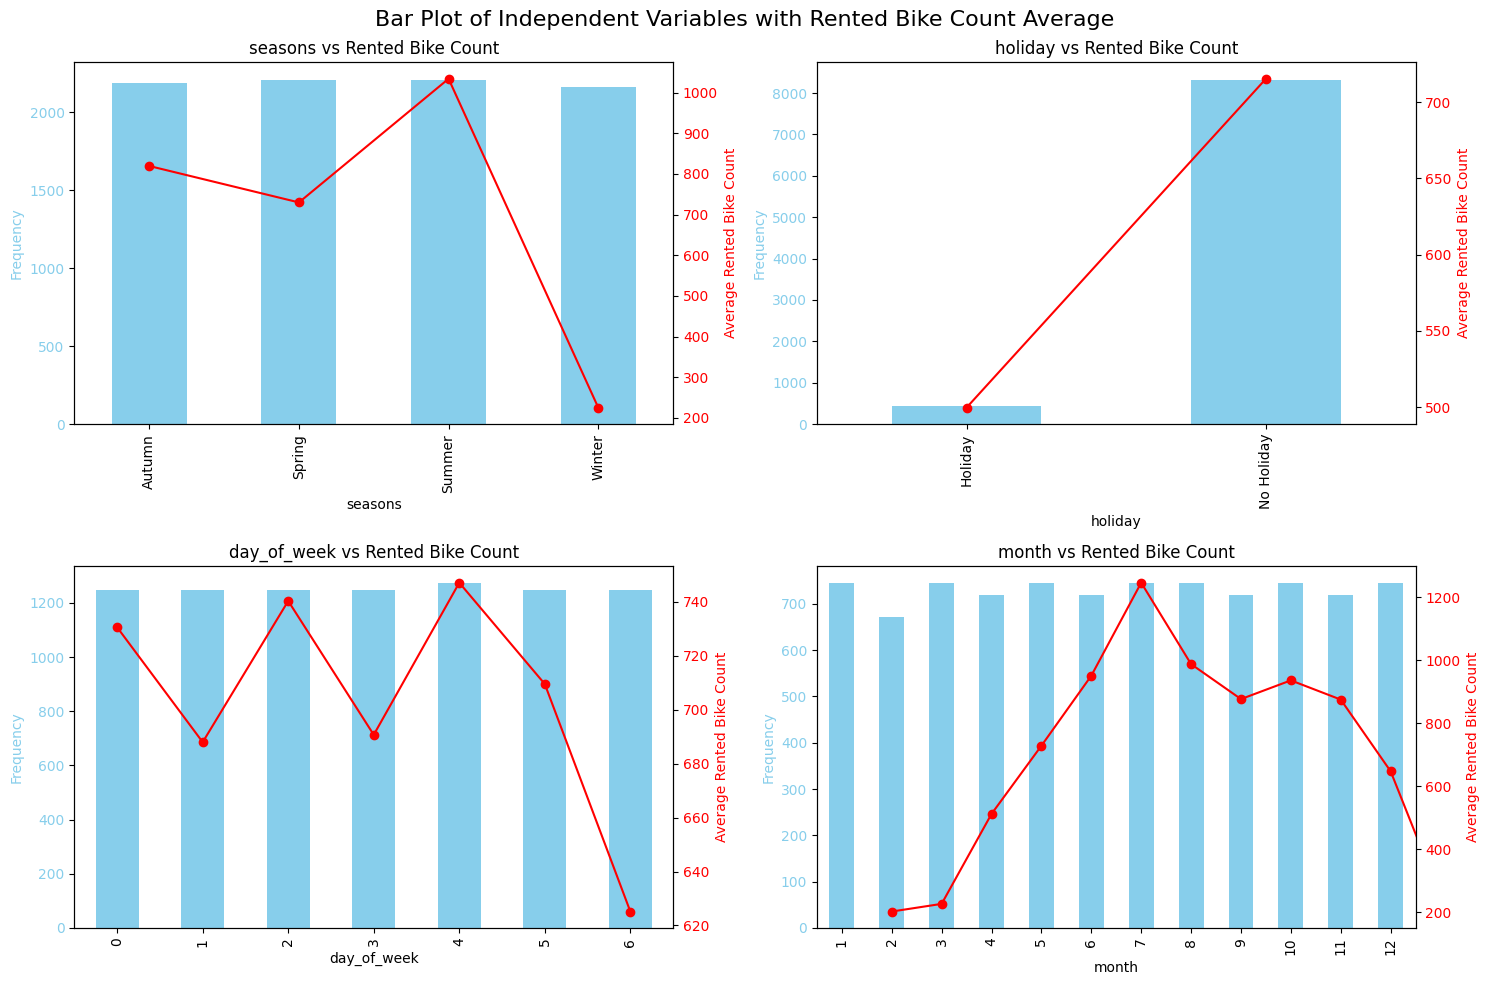

In [ ]:
# prompt: 'seasons', 'holiday', 'day_of_week','month'  컬럼에 대해 왼쪽 축에는 빈도를 나타내는 막대그래프를 그리고 오른쪽 축에는  rented_bike_count의 평균값을 나타내는 선그래프를 그리되, 2열로 정렬이 되는 코드를 제공해주세요

import matplotlib.pyplot as plt

# 컬럼 리스트
columns = ['seasons', 'holiday', 'day_of_week', 'month']

# 2열로 그래프 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Bar Plot of Independent Variables with Rented Bike Count Average', fontsize=16)

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # 막대그래프 (왼쪽 축)
    df.groupby(column)['rented_bike_count'].count().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_ylabel('Frequency', color='skyblue')
    ax.tick_params(axis='y', labelcolor='skyblue')

    # 선그래프 (오른쪽 축)
    ax2 = ax.twinx()
    df.groupby(column)['rented_bike_count'].mean().plot(kind='line', ax=ax2, color='red', marker='o')
    ax2.set_ylabel('Average Rented Bike Count', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    ax.set_title(f'{column} vs Rented Bike Count')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: 'temperature', 'humidity', 'wind_speed','visibility','dew_point_temperature', 'solar_radiation', 'rainfall','snowfall' 변수에 대해 seaborn에서 제공하는 산점도를 그리는 코드를 제공해주세요

import matplotlib.pyplot as plt
import seaborn as sns

# 컬럼 리스트
columns = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']

# 산점도 행렬 그리기
sns.pairplot(df[['rented_bike_count'] + columns])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

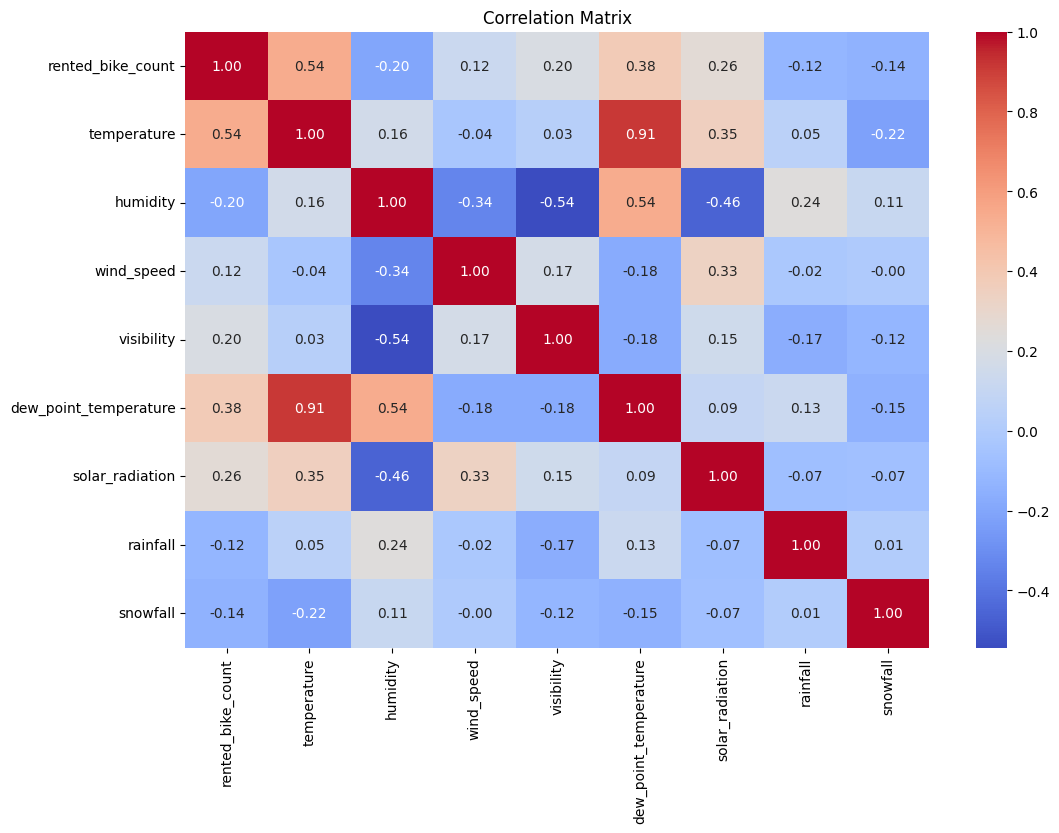

In [ ]:
# prompt: 'temperature', 'humidity', 'wind_speed','visibility','dew_point_temperature', 'solar_radiation', 'rainfall','snowfall' 변수에 대해 heatmap을 그릴 수 있는 코드를 제공해주세요

import matplotlib.pyplot as plt
# 상관계수 계산
correlation_matrix = df[['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df_f.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'day_of_week',
       'month'],
      dtype='object')

# 3. 최종 정제 및 전처리 결과

In [ ]:
df_f=df[df['functioning_day'] != 'No']
df_f

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day_of_week,month
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
2018-11-30 20:00:00,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11
2018-11-30 21:00:00,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,11


In [ ]:
# prompt: df_f DataFrame 사용: 'temperature', 'humidity', 'wind_speed', ''visibility','dew_point_temperature','solar_radiation', 'rainfall','snowfall' 컬럼을 표준화하는 코드를 제공해주세요

# 필요한 라이브러리 import
from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택
cols_to_scale = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 선택한 컬럼을 표준화
df_f[cols_to_scale] = scaler.fit_transform(df_f[cols_to_scale])
df_f


<ipython-input-92-9d9e976dd515>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[cols_to_scale] = scaler.fit_transform(df_f[cols_to_scale])


,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day_of_week,month
datetime,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 01:00:00,204,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 02:00:00,173,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 03:00:00,107,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
2017-12-01 04:00:00,78,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,Winter,No Holiday,Yes,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,-0.708138,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,Autumn,No Holiday,Yes,4,11
2018-11-30 20:00:00,764,-0.774233,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,Autumn,No Holiday,Yes,4,11
2018-11-30 21:00:00,694,-0.840329,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,Autumn,No Holiday,Yes,4,11


In [ ]:
# prompt: df_f DataFrame 사용: 'seasons', 'holiday',  'day_of_week', 'month' 컬럼에 대해서 one-hot encoding을 적용하고, 'functioning_day', 컬럼은 삭제하는 코드를 제공해주세요

# 필요한 라이브러리 import
import pandas as pd

# 원핫 인코딩을 적용할 컬럼 목록
columns_to_encode = ['seasons', 'holiday', 'day_of_week', 'month']

# 원핫 인코딩 적용
df_f = pd.get_dummies(df_f, columns=columns_to_encode)

# 'functioning_day' 컬럼 삭제
df_f = df_f.drop('functioning_day', axis=1)

df_f.info()
df_f


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8465 non-null   int64  
 1   temperature            8465 non-null   float64
 2   humidity               8465 non-null   float64
 3   wind_speed             8465 non-null   float64
 4   visibility             8465 non-null   float64
 5   dew_point_temperature  8465 non-null   float64
 6   solar_radiation        8465 non-null   float64
 7   rainfall               8465 non-null   float64
 8   snowfall               8465 non-null   float64
 9   seasons_Autumn         8465 non-null   bool   
 10  seasons_Spring         8465 non-null   bool   
 11  seasons_Summer         8465 non-null   bool   
 12  seasons_Winter         8465 non-null   bool   
 13  holiday_Holiday        8465 non-null   bool   
 14  holiday_No Holiday  

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons_Autumn,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,False,...,False,False,False,False,False,False,False,False,False,True
2017-12-01 01:00:00,204,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,False,...,False,False,False,False,False,False,False,False,False,True
2017-12-01 02:00:00,173,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,False,...,False,False,False,False,False,False,False,False,False,True
2017-12-01 03:00:00,107,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,False,...,False,False,False,False,False,False,False,False,False,True
2017-12-01 04:00:00,78,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30 19:00:00,1003,-0.708138,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,True,...,False,False,False,False,False,False,False,False,True,False
2018-11-30 20:00:00,764,-0.774233,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,True,...,False,False,False,False,False,False,False,False,True,False
2018-11-30 21:00:00,694,-0.840329,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,True,...,False,False,False,False,False,False,False,False,True,False
